<a href="https://colab.research.google.com/github/driisss/Intro-To-AI/blob/main/multilinear_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Beta Coefficients: [0.66666667 1.38888889 0.38888889]


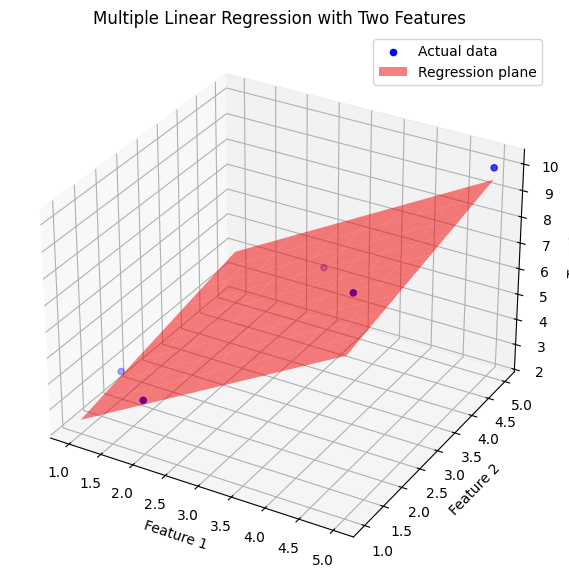

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample dataset: 5 data points, 2 features
X = np.array([
    [1, 2],
    [2, 1],
    [3, 4],
    [4, 3],
    [5, 5]
])

y = np.array([3, 4, 6, 7, 10])  # Target values

# Add intercept (bias) term: column of 1s
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # shape: (5, 3)

# Normal equation: beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Predicted values
y_pred = X_b.dot(beta)

print("Beta Coefficients:", beta)

# 3D Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot original data points
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Actual data')

# Create a mesh grid for the regression plane
x_surf, y_surf = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 10),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
)

# Calculate corresponding z values using the regression coefficients
z_surf = beta[0] + beta[1] * x_surf + beta[2] * y_surf

# Plot the regression plane
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.5, color='red', label='Regression plane')

# Labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('Multiple Linear Regression with Two Features')

plt.legend()
plt.show()


Intercept (β₀): 458512.15620281023
Coefficients (β): [  983.34031668 -7853.04751679]


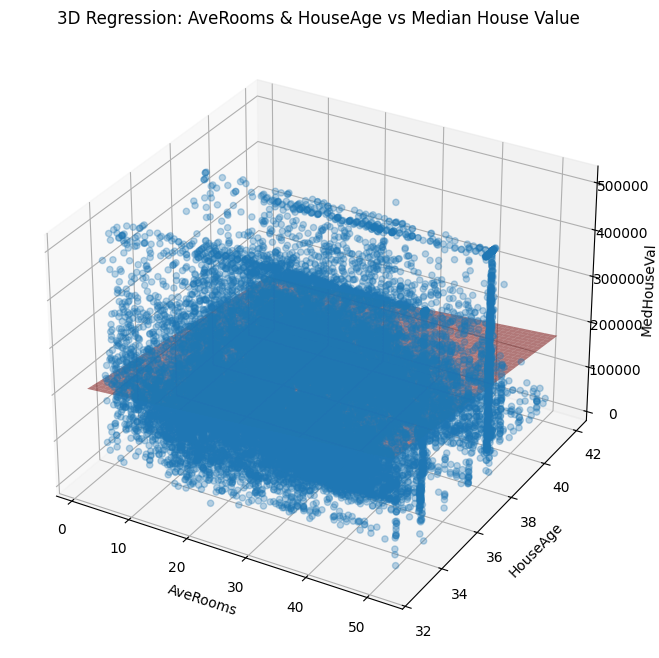

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Column names
column_names = [
    "MedInc", "HouseAge", "AveRooms", "AveBedrms",
    "Population", "AveOccup", "Latitude", "Longitude", "MedHouseVal"
]

# Load dataset
df = pd.read_csv("/content/cal_housing.data", header=None, names=column_names)

# Select TWO features and the target
X = df[["AveRooms", "HouseAge"]]
y = df["MedHouseVal"]

# Train model
model = LinearRegression()
model.fit(X, y)

print("Intercept (β₀):", model.intercept_)
print("Coefficients (β):", model.coef_)

# 3D Scatter Plot with Regression Plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter actual data
ax.scatter(X["AveRooms"], X["HouseAge"], y, alpha=0.3, label="Data points")

# Create a meshgrid for the plane
x_surf, y_surf = np.meshgrid(
    np.linspace(X["AveRooms"].min(), X["AveRooms"].max(), 50),
    np.linspace(X["HouseAge"].min(), X["HouseAge"].max(), 50)
)
z_surf = (
    model.intercept_
    + model.coef_[0] * x_surf
    + model.coef_[1] * y_surf
)

# Plot regression plane
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)

# Labels
ax.set_xlabel("AveRooms")
ax.set_ylabel("HouseAge")
ax.set_zlabel("MedHouseVal")
ax.set_title("3D Regression: AveRooms & HouseAge vs Median House Value")

plt.show()

# --- Predict from user input ---
try:
    rooms = float(input("Enter average number of rooms: "))
    age = float(input("Enter house age: "))
    input_df = pd.DataFrame([[rooms, age]], columns=["AveRooms", "HouseAge"])
    prediction = model.predict(input_df)
    print(f"Predicted Median House Value: ${prediction[0]:,.2f}")
except ValueError:
    print("Invalid input. Please enter numeric values.")


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Column names
column_names = [
    "MedInc", "HouseAge", "AveRooms", "AveBedrms",
    "Population", "AveOccup", "Latitude", "Longitude", "MedHouseVal"
]

# Load dataset
df = pd.read_csv("/content/cal_housing.data", header=None, names=column_names)

# Select all features (excluding the target)
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

# Train model
model = LinearRegression()
model.fit(X, y)

print("Intercept (β₀):", model.intercept_)
print("Coefficients (β):", model.coef_)

# --- Predict from user input ---
try:
    med_inc = float(input("Enter Median Income: "))
    age = float(input("Enter House Age: "))
    avg_rooms = float(input("Enter Average Number of Rooms: "))
    avg_bedrooms = float(input("Enter Average Number of Bedrooms: "))
    population = float(input("Enter Population: "))
    avg_occup = float(input("Enter Average Occupancy: "))
    latitude = float(input("Enter Latitude: "))
    longitude = float(input("Enter Longitude: "))

    input_data = [[
        med_inc, age, avg_rooms, avg_bedrooms,
        population, avg_occup, latitude, longitude
    ]]

    input_df = pd.DataFrame(input_data, columns=X.columns)
    prediction = model.predict(input_df)
    print(f"\n Predicted Median House Value: ${prediction[0]:,.2f}")

except ValueError:
    print(" Invalid input. Please enter numeric values.")


Intercept (β₀): -3594022.941876749
Coefficients (β): [-4.28237438e+04 -4.25767219e+04  1.15630387e+03 -8.18164928e+00
  1.13410689e+02 -3.85350953e+01  4.83082868e+01  4.02485142e+04]
Enter Median Income: 4455
Enter House Age: 3
Enter Average Number of Rooms: 4
Enter Average Number of Bedrooms: 2
Enter Population: 12345
Enter Average Occupancy: 09875
Enter Latitude: 345
Enter Longitude: 332

 Predicted Median House Value: $-180,098,228.88
